## <center>Victoria Traffic - road crashes</center>


dataset: https://www.data.vic.gov.au/data/dataset/crash-stats-data-extract (Crash Stats)

### Q: What are the possible causes of most road crashes in Victoria for last five years?

In [17]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import arange
import calendar

In [18]:
#import csv files and set the accident_no as index
data1 = pd.read_csv("ACCIDENT.csv", low_memory = False)
data2 = pd.read_csv("PERSON.csv", low_memory = False)
data3 = pd.read_csv("ROAD_SURFACE_COND.csv", low_memory = False)

In [19]:
df1 = pd.DataFrame(data1, columns = ['ACCIDENT_NO','ACCIDENTDATE', 'ACCIDENTTIME', 'ACCIDENT_TYPE','Accident Type Desc',
                                     'DAY_OF_WEEK', 'Day Week Description','LIGHT_CONDITION', 'Light Condition Desc','ROAD_GEOMETRY',
                                     'Road Geometry Desc','SPEED_ZONE'])
df2 = pd.DataFrame(data2,columns = ['ACCIDENT_NO','SEX','AGE','ROAD_USER_TYPE','Road User Type Desc'])
df3 = pd.DataFrame(data3)

In [20]:
#convert to datetime and select dates between 2013-01-01 to 2017-12-31
df1['ACCIDENTDATE'] = pd.to_datetime(df1['ACCIDENTDATE'])
df1 = df1[(df1['ACCIDENTDATE'] >= pd.Timestamp("2013-01-01")) & (df1['ACCIDENTDATE'] <= pd.Timestamp("2017-12-31"))]

In [21]:
# the maximum speed is 100 km/h in Victoria 
df1['SPEED_ZONE'] = df1['SPEED_ZONE'].mask(df1['SPEED_ZONE'] > 100, np.nan)
#add matched part of df3
df1 = pd.merge(df1,df3,on='ACCIDENT_NO')

In [22]:
#clean dataset (delete nan values)
df1 = df1.replace([0,'',0.0, '0', '0.0', 'nan', '[]','{}',{0},'Nan','NaT','Unknown'],np.nan)
df1 = df1.dropna()

(-1.1143685825438967,
 1.100684218216376,
 -1.1156491469154917,
 1.1116472618795954)

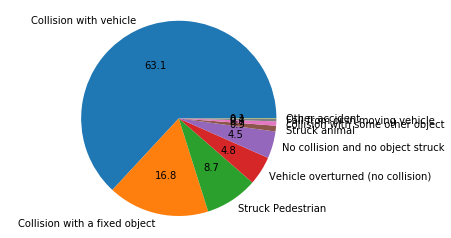

In [26]:
#Accident Type
atype = df1['Accident Type Desc'].value_counts()
plt.pie(atype.values,explode=None,labels=atype.keys(),autopct='%.1f')
plt.axis('equal')

In [27]:
#select only collision with vehicle
df1 = df1[df1['ACCIDENT_TYPE']==1]

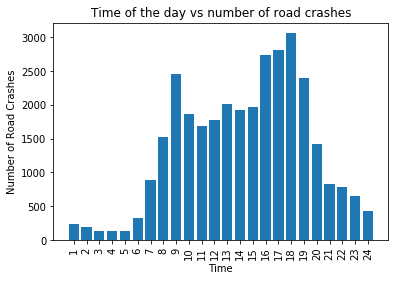

In [28]:
#time of the day
#count the number of crashes for each hour into a dictionary 
hour_dict = defaultdict(int)
Hour = pd.to_datetime(df1['ACCIDENTTIME'], format="%H.%M.%S").dt.hour
for i in Hour:
    hour_dict[i] += 1
    
#sort in time order, append time and number of crashes into seperate lists
hour_dict = sorted(hour_dict.items())
hour = []
crash_num = []
for x,y in hour_dict:
    hour.append(x)
    crash_num.append(y)
plt.bar(hour,crash_num)

#add x-labels, y-labels and title
plt.xticks(range(24),range(1,25), rotation=90)
plt.xlabel('Time')
plt.ylabel('Number of Road Crashes')
plt.title('Time of the day vs number of road crashes')
plt.show()

Text(0.5,1,'Male vs Female drivers in road crashes')

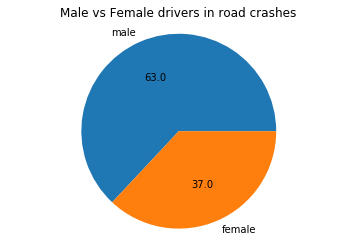

In [30]:
#gender of drivers
for i in df2['ACCIDENT_NO']:
    if i not in df1['ACCIDENT_NO']:
        i = np.nan
df2 = df2.replace(['Unknown',0,'0'],np.nan)   
df2['ROAD_USER_TYPE'] = pd.to_numeric(df2['ROAD_USER_TYPE'],errors='coerce')
df2 = df2.dropna()
df2['ROAD_USER_TYPE'] = df2['ROAD_USER_TYPE'].astype(int)
#filter drivers only 
df2 = df2[df2['ROAD_USER_TYPE']!=1]
df2 = df2[df2['ROAD_USER_TYPE']!=3]
df2 = df2[df2['ROAD_USER_TYPE']!=5]
df2 = df2[df2['ROAD_USER_TYPE']!=8]
df2 = df2[df2['ROAD_USER_TYPE']!=9]

#count the number of road crashes for male and female respectively 
male = 0
female = 0
for i in df2['SEX']:
    if i == 'M':
        male+=1
    elif i == 'F':
        female+=1
plt.pie([male,female],explode=None,labels=['male','female'],autopct='%.1f')
plt.axis('equal')
plt.title('Male vs Female drivers in road crashes')

(-1.1066181204510857,
 1.1003151485981155,
 -1.1003637739087373,
 1.1066205555863309)

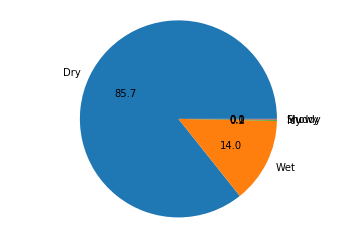

In [35]:
#road surface condition 
surface = df1['Surface Cond Desc'].value_counts()
plt.pie(surface.values,explode=None,labels=surface.keys(),autopct='%.1f')
plt.axis('equal')

Text(0,0.5,'Number of road crashes')

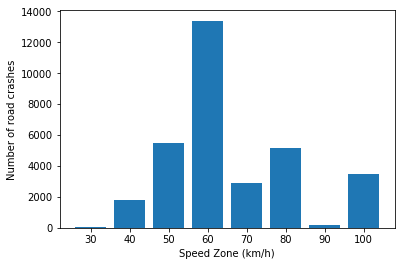

In [32]:
#Speed Zone
speed_dict = {30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
#find the number of road crashes for each speed zone
for i in df1['SPEED_ZONE']:
    if i in speed_dict.keys():
        speed_dict[i]+=1
plt.bar(arange(len(speed_dict.values())),speed_dict.values())
plt.xticks(arange(len(speed_dict.keys())),speed_dict.keys())
plt.xlabel('Speed Zone (km/h)')
plt.ylabel('Number of road crashes')

## Conclusion
In order to answer the question of what are the possible causes of road crashes, I have done the analysis of causes of road accidents in the accident type, time of the day, gender of driver, speed zone, road surface condition and road geometry. I have found that 63% of road accidents are collisions between verticles, and mainly occur at 9am and 16 to 18pm which are the morning and evening peak hours. In addition, among these road crashes, 63% drivers are male and 37% are female, which means the possibility of car collision by male driver is almost the twice of female. Morever, in the 85.7% of time that road surface is dry. And road crashes often happen in 60km/h speed zone. My only problem in preprocessing the dataset is that it is too large, and taking a good while to process. 